# A brief introduction to computational genetics

Genetics is the study of how hereditary material is transmitted from one generation to the next. Each of our cells has a record of our genomes encoded in DNA, which we can then measure using machines called "sequencers".

What sequencers allow us to measure is at a given position in the genome, whether an individual carrys the same nucleotide (A,C,G,T) or two different nucleotides, or **alleles**. You can visually see how alleles are distributed across our chromosomes below. 

![title](img/picture.png)


In [1]:
import numpy as np 
import matplotlib.pyplot as plt

%matplotlib inline

## Hardy-Weinberg Equilibrium

One of the core ideas in modern genetics is that when genetic material is passed down it is done so *independently*. One easy way to think about is that we recieve **two** chromosomes, one from our mother and one from our father. We can expand this notion to thinking about a population as a whole, where a particular genetic variant (or *allele*) is present at a frequency of $p$. Since we only get two "coin-flips" we can then see what the probability is of getting 0,1, or 2 copies of the allele: 

$P(\text{zero copies}) = (1 - p) \times (1 - p) = (1 - p)^2$

$P(\text{one copy}) = p\times (1-p) + (1 - p)\times p = 2p(1-p)$

$P(\text{two copies}) = p\times p = p^2$


Before we interact with any data, lets see if we can setup some expectations for our data based on this kind of "two-coin flip" analogy. 

In [2]:
def hardy_weinberg(p):
    """Provide genotype frequencies assuming allele frequencies."""
    assert (p >= 0.0) and (p <= 1.0)
    return (1-p)**2, 2*p*(1-p), p**2

Text(0, 0.5, 'Genotype Frequency')

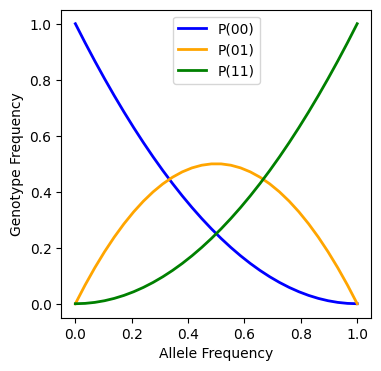

In [3]:
fig, ax = plt.subplots(1,1,figsize=(4,4))

# Setup a linear space of allele frequencies
ps = np.linspace(0.0, 1.0, 30)
geno_exp = np.array([hardy_weinberg(p) for p in ps])
ax.plot(ps, geno_exp[:,0], lw=2, label='P(00)', color='blue')
ax.plot(ps, geno_exp[:,1], lw=2, label='P(01)', color='orange')
ax.plot(ps, geno_exp[:,2], lw=2, label='P(11)', color='green')
ax.legend()
ax.set_xlabel('Allele Frequency')
ax.set_ylabel('Genotype Frequency')

## Matching our expectations to data in the 1000 Genomes Project

One of the coolest things about science is that we often are after a kind of three-step process:

1. Set some expectations for what we expect data to look like
2. Process some data and manipulate it
3. See if our predictions match our data! 

We've already gone through the first part (making a prediction), and I've processed some data for us, so now we can try to match our expectations to actual data. In this exercise we'll be looking at data from a set of 179 european-ancestry individuals first. These data are from a small section of one of the first large-scale studies of human genetic diversity called the [1000 Genomes Project](https://www.internationalgenome.org/)

In [4]:
# Loading in the data 
data = np.load('data/npz_files/ceu.chr22.1kg_phase3.ld_pruned.npz')
afs = data['af']
geno = data['geno']

Now that we've loaded in our data, we can ask some basic questions about the data. For example, lets try to answer the following questions (using python): 

1. What is the mean allele frequency of these variants in the sample?
2. How many individuals were sampled?
3. How many variants are present in this dataset?

The data are loaded in as well-described `numpy` arrays which have nice attributes like `.size` and `.shape` to help us potentially answer these questions!

In [5]:
print(f'Mean allele frequency: {np.mean(afs)}')
print(f'Number of individuals: {geno.shape[1]}')
print(f'Number of variants: {geno.shape[0]}')

Mean allele frequency: 0.06581079375053843
Number of individuals: 179
Number of variants: 61023


Now that we've addressed some basic questions about the data, lets try to write a function to calculate the "genotype frequencies". This is the y-axis of the plot that we made above with our expectations under hardy-weinberg equilibrium. 

In [6]:
def genotype_frequencies(geno):
    """Estimate the genotype frequencies."""
    n = geno.shape[1]
    # NOTE: this is actually a cool trick to count the number of '0's across each row (or variant)!
    f00 = (geno == 0).sum(axis = 1) / n
    f01 = (geno == 1).sum(axis = 1) / n
    f11 = (geno == 2).sum(axis = 1) / n
    return f00, f01, f11

f00, f01, f11 = genotype_frequencies(geno=geno)

Text(0, 0.5, 'Genotype Frequency')

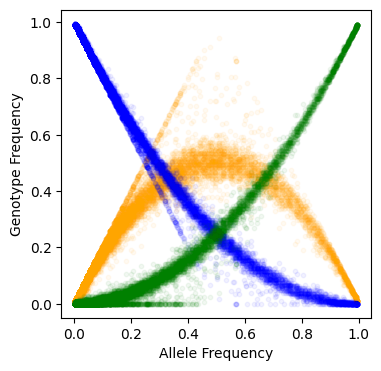

In [7]:
fig, ax = plt.subplots(1,1,figsize=(4,4))

# Step1: Lets plot the allele frequency (across the whole sample) 
ax.scatter(afs, f01, s=10, alpha=0.05, color='orange')
# ax.scatter(afs, f00, s=10, alpha=0.05, color='blue')
# ax.scatter(afs, f11, s=10, alpha=0.05, color='green')

# Step 2: What happens if we overlay some of our predictions!
# ps = np.linspace(0.0, 1.0, 30)
# geno_exp = np.array([hardy_weinberg(p) for p in ps])
# ax.plot(ps, geno_exp[:,0], lw=2, label='P(00)', color='red')
# ax.plot(ps, geno_exp[:,1], lw=2, label='P(01)', color='red')
# ax.plot(ps, geno_exp[:,2], lw=2, label='P(11)', color='red')

ax.set_xlabel('Allele Frequency')
ax.set_ylabel('Genotype Frequency')

What is kind of incredible is that this actually seems to match the data quite well! This helps to illustrate that even these kind of simple predictions (we started with thinking about flipping coins!) can be really useful to understand measurements we can make in the real world!